## Filtering TimeLapse Images

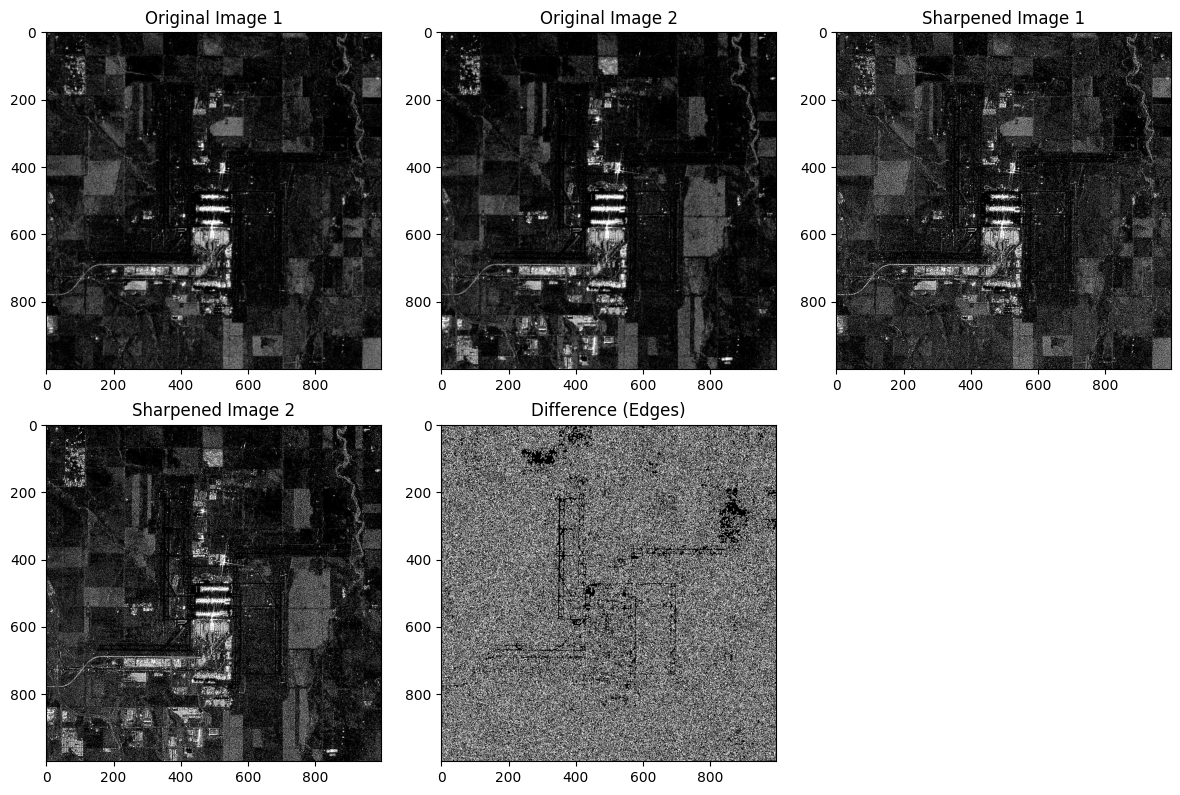

In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

def read_images(folder_path):
    # Read all images in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    if len(image_files) < 2:
        raise ValueError("The folder must contain at least two images for comparison.")
    
    image1 = cv2.imread(os.path.join(folder_path, image_files[0]), cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(os.path.join(folder_path, image_files[86]), cv2.IMREAD_GRAYSCALE)
    return image1, image2

def sharpen_image(image):
    # Sharpening kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

def apply_edge_detection(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

def compare_images(image1, image2):
    # Compute the absolute difference
    difference = cv2.absdiff(image1, image2)
    return difference

def main():
    folder_path = 'DEN_timelapse'  # Path to the folder containing images

    # Step 1: Read Images
    image1, image2 = read_images(folder_path)

    # Step 2: Preprocess Images
    sharpened1 = sharpen_image(image1)
    sharpened2 = sharpen_image(image2)

    # Step 3: Edge Detection
    edges1 = apply_edge_detection(sharpened1)
    edges2 = apply_edge_detection(sharpened2)

    # Step 4: Compare Images
    difference = compare_images(edges1, edges2)

    # Step 5: Visualization
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.title('Original Image 1')
    plt.imshow(image1, cmap='gray')
    plt.subplot(2, 3, 2)
    plt.title('Original Image 2')
    plt.imshow(image2, cmap='gray')
    plt.subplot(2, 3, 3)
    plt.title('Sharpened Image 1')
    plt.imshow(sharpened1, cmap='gray')
    plt.subplot(2, 3, 4)
    plt.title('Sharpened Image 2')
    plt.imshow(sharpened2, cmap='gray')
    plt.subplot(2, 3, 5)
    plt.title('Difference (Edges)')
    plt.imshow(difference, cmap='gray')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [8]:
def histogram_equalization(image):
    # Enhance contrast using histogram equalization
    equalized = cv2.equalizeHist(image)
    return equalized

def threshold_image(image):
    # Apply thresholding to emphasize changes
    _, thresholded = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
    return thresholded

def morphological_filter(image):
    # Morphological transformations to segment features
    kernel = np.ones((5, 5), np.uint8)
    opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return opened

def compute_difference(image1, image2):
    # Compute the absolute difference
    difference = cv2.absdiff(image1, image2)
    return difference

def zoom_into_area(image, region):
    # Crop the image to the specified region
    x, y, w, h = region  # Region as (x, y, width, height)
    return image[y:y+h, x:x+w]

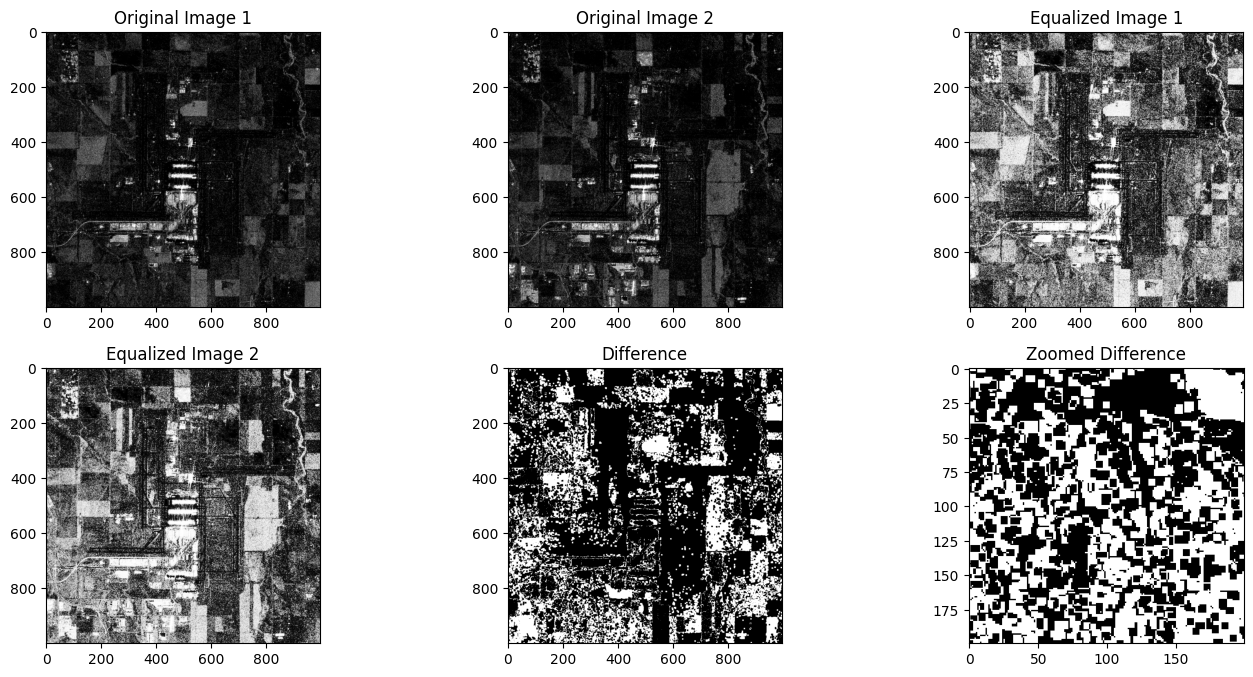

In [15]:
folder_path = 'DEN_timelapse' 

image1, image2 = read_images(folder_path)

equalized1 = histogram_equalization(image1)
equalized2 = histogram_equalization(image2)

thresholded1 = threshold_image(equalized1)
thresholded2 = threshold_image(equalized2)

opened1 = morphological_filter(thresholded1)
opened2 = morphological_filter(thresholded2)
difference = compute_difference(opened1, opened2)

# Step 4: Zoom into Significant Change Area (Example Region)
# Define a region of interest (ROI) for zooming (manually or using largest difference areas)
zoom_region = (200, 800, 200, 200)  # Example region: (x, y, width, height)
zoomed_difference = zoom_into_area(difference, zoom_region)

# Step 5: Visualization
plt.figure(figsize=(14, 10))
plt.subplot(3, 3, 1)
plt.title('Original Image 1')
plt.imshow(image1, cmap='gray')
plt.subplot(3, 3, 2)
plt.title('Original Image 2')
plt.imshow(image2, cmap='gray')
plt.subplot(3, 3, 3)
plt.title('Equalized Image 1')
plt.imshow(equalized1, cmap='gray')
plt.subplot(3, 3, 4)
plt.title('Equalized Image 2')
plt.imshow(equalized2, cmap='gray')
plt.subplot(3, 3, 5)
plt.title('Difference')
plt.imshow(difference, cmap='gray')
plt.subplot(3, 3, 6)
plt.title('Zoomed Difference')
plt.imshow(zoomed_difference, cmap='gray')
plt.tight_layout()
plt.show()